Persiapan Data 

In [234]:
# import datanya dulu
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt

In [235]:
# pilih data darimana yang mau dipake
df = pd.read_csv("epl-goalScorer(20-21).csv")
df.sample(5) # nampilin 5 data random

,Unnamed: 0,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
170,170,537,Andy Carroll,18,369,1,0.603317,0,0.063020,13,2,1,0,F S,Newcastle United,1,0.603317,0.989015,0.542128
190,190,853,Paul Dummett,15,1254,1,0.444092,0,0.229145,3,4,2,0,D S,Newcastle United,1,0.444092,3.159808,2.978621
415,415,6736,Ibrahima Diallo,21,909,0,0.543975,0,0.228212,5,7,2,0,M S,Southampton,0,0.543975,2.648569,2.391124
316,316,772,Moussa Sissoko,25,1563,0,0.248073,0,0.184409,3,4,3,0,D M S,Tottenham,0,0.248073,4.136225,3.926961
47,47,7490,Mason Greenwood,31,1825,7,6.975748,2,2.427900,67,14,2,0,F M S,Manchester United,7,6.975748,14.031833,5.954059


In [236]:
# cek data 5 baris teratas
df.head()

,Unnamed: 0,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,0,647,Harry Kane,35,3097,23,22.174859,14,7.577094,138,49,1,0,F,Tottenham,19,19.130183,24.995648,4.451257
1,1,1250,Mohamed Salah,37,3085,22,20.250847,5,6.528526,126,55,0,0,F M S,Liverpool,16,15.683834,28.968234,9.800236
2,2,1228,Bruno Fernandes,37,3117,18,16.019454,12,11.474996,121,95,6,0,M S,Manchester United,9,8.407840,26.911412,11.932285
3,3,453,Son Heung-Min,37,3139,17,11.023287,10,9.512992,68,75,0,0,F M S,Tottenham,16,10.262118,20.671916,6.608751
4,4,822,Patrick Bamford,38,3085,17,18.401863,7,3.782247,107,30,3,0,F S,Leeds,15,16.879525,23.394953,4.131796


In [237]:
# cek data 5 baris terbawah
df.tail()

,Unnamed: 0,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
517,517,9415,Jaden Philogene-Bidace,1,1,0,0.000000,0,0.0,0,0,0,0,S,Aston Villa,0,0.000000,0.056044,0.056044
518,518,9423,Gaetano Berardi,2,113,0,0.074761,0,0.0,1,0,0,0,D S,Leeds,0,0.074761,0.231278,0.231278
519,519,9524,Anthony Elanga,1,67,0,0.000000,0,0.0,0,0,0,0,M,Manchester United,0,0.000000,0.000000,0.000000
520,520,9540,Femi Seriki,1,1,0,0.000000,0,0.0,0,0,0,0,S,Sheffield United,0,0.000000,0.000000,0.000000
521,521,9552,Tyrese Francois,1,13,0,0.000000,0,0.0,0,0,0,0,S,Fulham,0,0.000000,0.000000,0.000000


In [238]:
print(df.dtypes) # cek tipe data

Unnamed: 0        int64
id                int64
player_name      object
games             int64
time              int64
goals             int64
xG              float64
assists           int64
xA              float64
shots             int64
key_passes        int64
yellow_cards      int64
red_cards         int64
position         object
team_title       object
npg               int64
npxG            float64
xGChain         float64
xGBuildup       float64
dtype: object


In [239]:
# cek data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    522 non-null    int64  
 1   id            522 non-null    int64  
 2   player_name   522 non-null    object 
 3   games         522 non-null    int64  
 4   time          522 non-null    int64  
 5   goals         522 non-null    int64  
 6   xG            522 non-null    float64
 7   assists       522 non-null    int64  
 8   xA            522 non-null    float64
 9   shots         522 non-null    int64  
 10  key_passes    522 non-null    int64  
 11  yellow_cards  522 non-null    int64  
 12  red_cards     522 non-null    int64  
 13  position      522 non-null    object 
 14  team_title    522 non-null    object 
 15  npg           522 non-null    int64  
 16  npxG          522 non-null    float64
 17  xGChain       522 non-null    float64
 18  xGBuildup     522 non-null    

In [240]:
df_noid = df.iloc[:] # membuat data baru dari data yang udah ada 
df_noid 

,Unnamed: 0,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,0,647,Harry Kane,35,3097,23,22.174859,14,7.577094,138,49,1,0,F,Tottenham,19,19.130183,24.995648,4.451257
1,1,1250,Mohamed Salah,37,3085,22,20.250847,5,6.528526,126,55,0,0,F M S,Liverpool,16,15.683834,28.968234,9.800236
2,2,1228,Bruno Fernandes,37,3117,18,16.019454,12,11.474996,121,95,6,0,M S,Manchester United,9,8.407840,26.911412,11.932285
3,3,453,Son Heung-Min,37,3139,17,11.023287,10,9.512992,68,75,0,0,F M S,Tottenham,16,10.262118,20.671916,6.608751
4,4,822,Patrick Bamford,38,3085,17,18.401863,7,3.782247,107,30,3,0,F S,Leeds,15,16.879525,23.394953,4.131796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,517,9415,Jaden Philogene-Bidace,1,1,0,0.000000,0,0.000000,0,0,0,0,S,Aston Villa,0,0.000000,0.056044,0.056044
518,518,9423,Gaetano Berardi,2,113,0,0.074761,0,0.000000,1,0,0,0,D S,Leeds,0,0.074761,0.231278,0.231278
519,519,9524,Anthony Elanga,1,67,0,0.000000,0,0.000000,0,0,0,0,M,Manchester United,0,0.000000,0.000000,0.000000
520,520,9540,Femi Seriki,1,1,0,0.000000,0,0.000000,0,0,0,0,S,Sheffield United,0,0.000000,0.000000,0.000000


In [241]:
df_noid.describe() # cek data yang udah dibuat

,Unnamed: 0,id,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,260.500000,4380.932950,19.643678,1420.068966,1.862069,2.000806,1.289272,1.376029,17.379310,12.963602,2.061303,0.091954,1.668582,1.821450,5.663368,3.455060
std,150.832689,3281.776121,11.619836,1031.604819,3.338851,3.317946,2.083350,1.886510,21.572664,16.164361,2.203661,0.295800,2.909929,2.931176,5.600249,3.376584
min,0.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,130.250000,839.750000,10.000000,470.250000,0.000000,0.074668,0.000000,0.049245,2.000000,1.000000,0.000000,0.000000,0.000000,0.074668,1.191391,0.720353
50%,260.500000,4627.000000,21.000000,1342.000000,1.000000,0.737295,0.000000,0.691122,10.000000,7.000000,2.000000,0.000000,0.500000,0.715585,4.252738,2.656397
75%,390.750000,7690.500000,30.000000,2319.000000,2.000000,2.053378,2.000000,2.050509,23.750000,19.000000,3.000000,0.000000,2.000000,1.945799,8.308002,5.254647
max,521.000000,9552.000000,38.000000,3420.000000,23.000000,22.174859,14.000000,11.474996,138.000000,95.000000,12.000000,2.000000,19.000000,19.130183,28.968234,18.323006


In [242]:
# jika ingin menampilkan juga statistik kolom- 
# yang bertipe non-numerik, mencakup beberapa banyak nilai unik- 
# dalam kolom (unique), nilai modus(top), serta frekuensi modus(freq)
df_noid.describe(include='all') # cek data yang udah dibuat

,Unnamed: 0,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
count,522.000000,522.000000,522,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522,522,522.000000,522.000000,522.000000,522.000000
unique,NaN,NaN,522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,28,NaN,NaN,NaN,NaN
top,NaN,NaN,Harry Kane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M S,Everton,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,28,NaN,NaN,NaN,NaN
mean,260.500000,4380.932950,NaN,19.643678,1420.068966,1.862069,2.000806,1.289272,1.376029,17.379310,12.963602,2.061303,0.091954,NaN,NaN,1.668582,1.821450,5.663368,3.455060
std,150.832689,3281.776121,NaN,11.619836,1031.604819,3.338851,3.317946,2.083350,1.886510,21.572664,16.164361,2.203661,0.295800,NaN,NaN,2.909929,2.931176,5.600249,3.376584
min,0.000000,65.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,130.250000,839.750000,NaN,10.000000,470.250000,0.000000,0.074668,0.000000,0.049245,2.000000,1.000000,0.000000,0.000000,NaN,NaN,0.000000,0.074668,1.191391,0.720353
50%,260.500000,4627.000000,NaN,21.000000,1342.000000,1.000000,0.737295,0.000000,0.691122,10.000000,7.000000,2.000000,0.000000,NaN,NaN,0.500000,0.715585,4.252738,2.656397
75%,390.750000,7690.500000,NaN,30.000000,2319.000000,2.000000,2.053378,2.000000,2.050509,23.750000,19.000000,3.000000,0.000000,NaN,NaN,2.000000,1.945799,8.308002,5.254647


In [243]:
df_noid.sum() # cek rata-rata

Unnamed: 0                                                 135981
id                                                        2286847
player_name     Harry KaneMohamed SalahBruno FernandesSon Heun...
games                                                       10254
time                                                       741276
goals                                                         972
xG                                                    1044.420572
assists                                                       673
xA                                                     718.287269
shots                                                        9072
key_passes                                                   6767
yellow_cards                                                 1076
red_cards                                                      48
position        FF M SM SF M SF SF SF SFM SF M SF SF SF SF SF ...
team_title      TottenhamLiverpoolManchester UnitedTottenhamLe...
npg       

In [244]:
df.head()

,Unnamed: 0,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,0,647,Harry Kane,35,3097,23,22.174859,14,7.577094,138,49,1,0,F,Tottenham,19,19.130183,24.995648,4.451257
1,1,1250,Mohamed Salah,37,3085,22,20.250847,5,6.528526,126,55,0,0,F M S,Liverpool,16,15.683834,28.968234,9.800236
2,2,1228,Bruno Fernandes,37,3117,18,16.019454,12,11.474996,121,95,6,0,M S,Manchester United,9,8.407840,26.911412,11.932285
3,3,453,Son Heung-Min,37,3139,17,11.023287,10,9.512992,68,75,0,0,F M S,Tottenham,16,10.262118,20.671916,6.608751
4,4,822,Patrick Bamford,38,3085,17,18.401863,7,3.782247,107,30,3,0,F S,Leeds,15,16.879525,23.394953,4.131796


In [245]:
df_nodi = df.select_dtypes(include=np.number)
df_nodi.mean() # cek rata-rata
# mean adalah rata-rata dari data

Unnamed: 0       260.500000
id              4380.932950
games             19.643678
time            1420.068966
goals              1.862069
xG                 2.000806
assists            1.289272
xA                 1.376029
shots             17.379310
key_passes        12.963602
yellow_cards       2.061303
red_cards          0.091954
npg                1.668582
npxG               1.821450
xGChain            5.663368
xGBuildup          3.455060
dtype: float64

In [246]:
# cek median dari data bertipe numerik
df_nodi.median()

Unnamed: 0       260.500000
id              4627.000000
games             21.000000
time            1342.000000
goals              1.000000
xG                 0.737295
assists            0.000000
xA                 0.691122
shots             10.000000
key_passes         7.000000
yellow_cards       2.000000
red_cards          0.000000
npg                0.500000
npxG               0.715585
xGChain            4.252738
xGBuildup          2.656397
dtype: float64

In [247]:
df_nodi.var() # cek varians
# varians adalah seberapa jauh data tersebar dari rata-rata

Unnamed: 0      2.275050e+04
id              1.077005e+07
games           1.350206e+02
time            1.064209e+06
goals           1.114793e+01
xG              1.100877e+01
assists         4.340345e+00
xA              3.558919e+00
shots           4.653798e+02
key_passes      2.612866e+02
yellow_cards    4.856120e+00
red_cards       8.749752e-02
npg             8.467687e+00
npxG            8.591795e+00
xGChain         3.136279e+01
xGBuildup       1.140132e+01
dtype: float64

In [248]:
df_nodi.std() # cek standar deviasi
# standar deviasi adalah akar dari varians

Unnamed: 0       150.832689
id              3281.776121
games             11.619836
time            1031.604819
goals              3.338851
xG                 3.317946
assists            2.083350
xA                 1.886510
shots             21.572664
key_passes        16.164361
yellow_cards       2.203661
red_cards          0.295800
npg                2.909929
npxG               2.931176
xGChain            5.600249
xGBuildup          3.376584
dtype: float64

In [249]:
df_nodi.quantile(0.75) # cek kuartil 3
# kuartil 3 adalah nilai yang membagi data menjadi 3 bagian

Unnamed: 0       390.750000
id              7690.500000
games             30.000000
time            2319.000000
goals              2.000000
xG                 2.053378
assists            2.000000
xA                 2.050509
shots             23.750000
key_passes        19.000000
yellow_cards       3.000000
red_cards          0.000000
npg                2.000000
npxG               1.945799
xGChain            8.308002
xGBuildup          5.254647
Name: 0.75, dtype: float64

In [250]:
q1 = df_nodi.quantile(0.25) # cek kuartil 1
q3 = df_nodi.quantile(0.75) # cek kuartil 3
iqr = q3 - q1 # cek IQR
iqr 
# IQR adalah jarak antara kuartil 1 dan kuartil 3

Unnamed: 0       260.500000
id              6850.750000
games             20.000000
time            1848.750000
goals              2.000000
xG                 1.978711
assists            2.000000
xA                 2.001264
shots             21.750000
key_passes        18.000000
yellow_cards       3.000000
red_cards          0.000000
npg                2.000000
npxG               1.871131
xGChain            7.116612
xGBuildup          4.534294
dtype: float64

In [251]:
# handle warning 
import warnings 
warnings.filterwarnings('ignore')

# outlier filter
df_nodi_align, iqr_new = df_nodi.align(iqr, axis=1, copy=False, join='outer')
outlier_filter = (df_nodi < q1 - 1.5 * iqr_new) | (df_nodi > q3 + 1.5 * iqr_new)
outlier_filter 

,Unnamed: 0,id,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup
0,False,False,False,False,True,True,True,True,True,True,False,False,True,True,True,False
1,False,False,False,False,True,True,False,True,True,True,False,False,True,True,True,False
2,False,False,False,False,True,True,True,True,True,True,False,False,True,True,True,False
3,False,False,False,False,True,True,True,True,True,True,False,False,True,True,True,False
4,False,False,False,False,True,True,True,False,True,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
520,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [252]:
df_noid[outlier_filter['assists']] \
    .loc[:, ['player_name', 'assists']] \
    .sort_values(by=['assists'], ascending=False)

,player_name,assists
0,Harry Kane,14
2,Bruno Fernandes,12
58,Kevin De Bruyne,11
3,Son Heung-Min,10
51,Jack Grealish,10
6,Jamie Vardy,9
15,Marcus Rashford,9
57,Raphinha,9
41,Jack Harrison,8
281,Aaron Cresswell,8


In [253]:
df_noid['team_title'].value_counts() # cek jumlah data yang sama

team_title
Everton                          28
West Bromwich Albion             28
Sheffield United                 27
Southampton                      27
Manchester United                27
Fulham                           27
Leicester                        27
Wolverhampton Wanderers          27
Liverpool                        27
Brighton                         26
Arsenal                          26
Newcastle United                 26
Burnley                          25
Chelsea                          25
Crystal Palace                   24
Manchester City                  24
Tottenham                        24
West Ham                         23
Aston Villa                      23
Leeds                            23
Arsenal,Newcastle United          1
Everton,Southampton               1
Aston Villa,Chelsea               1
Liverpool,Southampton             1
Chelsea,Fulham                    1
West Bromwich Albion,West Ham     1
Arsenal,West Bromwich Albion      1
Arsenal,Brighton 

In [254]:
df.groupby('team_title')['goals'].std() # cek standar deviasi dari goals berdasarkan team_title

team_title
Arsenal                          3.352381
Arsenal,Brighton                      NaN
Arsenal,Newcastle United              NaN
Arsenal,West Bromwich Albion          NaN
Aston Villa                      3.696489
Aston Villa,Chelsea                   NaN
Brighton                         2.158703
Burnley                          2.475210
Chelsea                          2.350177
Chelsea,Fulham                        NaN
Crystal Palace                   2.901461
Everton                          3.467727
Everton,Southampton                   NaN
Fulham                           1.439175
Leeds                            4.153193
Leicester                        4.020602
Liverpool                        4.931439
Liverpool,Southampton                 NaN
Manchester City                  3.867132
Manchester United                4.317855
Newcastle United                 2.483174
Sheffield United                 1.467599
Southampton                      3.141941
Tottenham              

In [255]:
df.groupby('team_title')['goals'].mean() # cek rata-rata dari goals berdasarkan team_title

team_title
Arsenal                          1.961538
Arsenal,Brighton                 0.000000
Arsenal,Newcastle United         8.000000
Arsenal,West Bromwich Albion     0.000000
Aston Villa                      2.130435
Aston Villa,Chelsea              3.000000
Brighton                         1.500000
Burnley                          1.280000
Chelsea                          2.240000
Chelsea,Fulham                   1.000000
Crystal Palace                   1.625000
Everton                          1.607143
Everton,Southampton              3.000000
Fulham                           0.925926
Leeds                            2.608696
Leicester                        2.370370
Liverpool                        2.370370
Liverpool,Southampton            3.000000
Manchester City                  3.208333
Manchester United                2.518519
Newcastle United                 1.384615
Sheffield United                 0.666667
Southampton                      1.555556
Tottenham              

In [256]:
df_nodi.loc[:,'games':].corr() # cek korelasi antar kolom

,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup
games,1.000000,0.944591,0.439730,0.463869,0.504168,0.562806,0.599164,0.617867,0.565963,0.160326,0.437110,0.465546,0.726598,0.697196
time,0.944591,1.000000,0.398930,0.411203,0.473555,0.516638,0.529534,0.575065,0.592223,0.186333,0.392631,0.408231,0.703801,0.731377
goals,0.439730,0.398930,1.000000,0.932798,0.617490,0.607330,0.873363,0.567752,0.097151,0.053679,0.971591,0.905710,0.727953,0.290990
xG,0.463869,0.411203,0.932798,1.000000,0.636205,0.627495,0.910214,0.570488,0.093761,0.048815,0.894286,0.979218,0.763909,0.282746
assists,0.504168,0.473555,0.617490,0.636205,1.000000,0.885850,0.721220,0.835299,0.209349,-0.021444,0.587316,0.615503,0.752587,0.473254
xA,0.562806,0.516638,0.607330,0.627495,0.885850,1.000000,0.759568,0.946506,0.243912,0.006284,0.585152,0.611100,0.814487,0.547983
shots,0.599164,0.529534,0.873363,0.910214,0.721220,0.759568,1.000000,0.743370,0.249957,0.073932,0.852989,0.901386,0.843152,0.448197
key_passes,0.617867,0.575065,0.567752,0.570488,0.835299,0.946506,0.743370,1.000000,0.343357,0.022780,0.539726,0.545537,0.807958,0.618754
yellow_cards,0.565963,0.592223,0.097151,0.093761,0.209349,0.243912,0.249957,0.343357,1.000000,0.165064,0.093270,0.089065,0.401884,0.562467
red_cards,0.160326,0.186333,0.053679,0.048815,-0.021444,0.006284,0.073932,0.022780,0.165064,1.000000,0.055542,0.047354,0.104005,0.167660


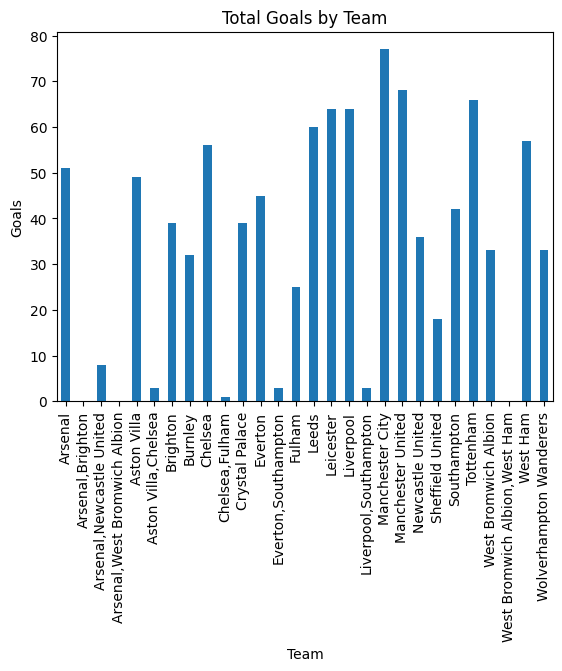

In [257]:
# menampilkan visualisasi data jumlah goals berdasarkan nama tim
df.groupby('team_title')['goals'].sum().plot(kind='bar')
plt.title('Total Goals by Team')
plt.xlabel('Team')
plt.ylabel('Goals')
plt.show()

